# Spotify User Behavior Analysis
---

### 🔎 Project Overview
In the digital age, music streaming platforms have revolutionized the way we access and interact with music. Spotify, a leader in this domain, offers a wealth of data that can provide insights into user behavior, preferences, and engagement patterns. This project aims to delve into Spotify's user data to uncover trends, understand user demographics, and analyze listening habits. By leveraging data visualization and analytics, we aim to provide actionable insights that can help tailor user experiences, improve engagement, and guide marketing strategies.

### 🎯 Objectives
* Understand User Demographics: Analyze the age, gender, and geographic distribution of Spotify users to identify key demographics.
* Listening Habits: Explore the types of music and podcasts users prefer, including genres, artists, and playlists.
* Engagement Patterns: Examine how different user segments engage with Spotify, including session lengths, frequency of use, and subscription plans.
* Recommendation Impact: Evaluate the effectiveness of Spotify's recommendation system in enhancing user experience and engagement.
* Prepare Data for PowerBI Visualization: Clean and structure the dataset for advanced analysis and visualization in PowerBI, enabling dynamic exploration of user behavior trends.

### 📊 Data Sources
The analysis is based on a dataset downloaded from Kaggle, featuring Spotify's user activity logs. This dataset includes various attributes such as user demographics (age, gender, geographic location), listening devices, favorite genres, subscription plans, and engagement metrics (e.g., session lengths, frequency of use).

### ⛏️ Tools and Techniques
The project utilizes Python for data manipulation and analysis, with libraries such as Pandas for data processing, Matplotlib and Seaborn for visualization, and additional data cleaning and preparation techniques to ensure the dataset is optimized for visualization in PowerBI.


🔑 To explore the dataset and for further details, you can visit the [Spotify User Behavior Dataset on Kaggle](https://www.kaggle.com/datasets/meeraajayakumar/spotify-user-behavior-dataset).

---

# 🔃 Data Loading

In this section, we load the Spotify user behavior dataset for analysis. The dataset includes various attributes such as user demographics, subscription plans, listening devices, preferred content, and engagement metrics.


In [95]:
# Imports necessary for data manipulation, visualization, and analysis
import pandas as pd
import numpy as np
import uuid
import seaborn as sns
import matplotlib.pyplot as plt

# Set pandas display parameters
pd.set_option('display.max_columns', None)

# Set visualization style
sns.set_style("whitegrid")

# Load the Spotify dataset
spotify_path = 'data/Spotify.xlsx'
spotify = pd.read_excel(spotify_path)

# Display the first few rows of the dataset to confirm successful loading
spotify.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


## 🕵🏻 Initial Data Inspection

After loading the dataset, it's crucial to perform some preliminary inspections to understand its structure, the types of data it contains, and to spot any obvious inconsistencies or missing values.


In [96]:
# Check the shape of the dataset to understand its size
print(f"The dataset contains {spotify.shape[0]} rows and {spotify.shape[1]} columns.")

The dataset contains 520 rows and 20 columns.


In [97]:
# Data types and missing values
print("\nData Types and Missing Values:")
print(spotify.info())


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  mus

In [98]:
# Basic descriptive statistics for numerical features
print("\nDescriptive Statistics for Numerical Features:")
spotify.describe()


Descriptive Statistics for Numerical Features:


,music_recc_rating
count,520.000000
mean,3.503846
std,0.979552
min,1.000000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


## 🧼 Data Cleaning

The goal of this section is to ensure the dataset is clean and ready for analysis. This includes handling missing values, correcting data types, and removing duplicates if any.


In [99]:
# Handling missing values
# Fill missing values for specific columns
# For categorical columns, consider using the mode or a placeholder value like 'Unknown'
spotify['fav_pod_genre'] = spotify['fav_pod_genre'].fillna('Unknown')
spotify['preffered_pod_format'] = spotify['preffered_pod_format'].fillna('Unknown')
spotify['pod_host_preference'] = spotify['pod_host_preference'].fillna('Unknown')
spotify['preffered_pod_duration'] = spotify['preffered_pod_duration'].fillna('Unknown')

# Adding UUIDs for further ___
spotify['UUID'] = [uuid.uuid4() for _ in range(len(spotify))]

# Remove duplicates
spotify = spotify.drop_duplicates()

# Confirm changes
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

## 📉 Summary Statistics Revisited

With the dataset cleaned, we now take a closer look at the summary statistics for both numerical and categorical variables to get a deeper understanding of our data.


In [100]:
# Summary statistics for numerical features
print(spotify.describe())

       music_recc_rating
count         520.000000
mean            3.503846
std             0.979552
min             1.000000
25%             3.000000
50%             3.500000
75%             4.000000
max             5.000000


In [101]:
# Frequency counts for categorical data
print(spotify['fav_music_genre'].value_counts())

fav_music_genre
Melody                       259
classical                     87
Pop                           85
Rap                           55
Electronic/Dance              16
All                            6
Rock                           4
Kpop                           4
Classical & melody, dance      2
Old songs                      1
trending songs random          1
Name: count, dtype: int64


## 🏗️ Adding New Columns for Enhanced Analysis

In this section, we will extend our dataset with additional columns derived from the existing data. These new metrics and categorizations can provide deeper insights into user behavior and preferences on Spotify.

##### Define User Engagement Levels

In [102]:
# Define a function to categorize users based on listening frequency and subscription
def define_engagement_level(frequency, is_subscribed):
    if frequency >= 'Daily' and is_subscribed == 'Yes':
        return 'Highly Engaged'
    elif frequency >= 'Weekly':
        return 'Moderately Engaged'
    else:
        return 'Low Engagement'

# Assuming 'music_lis_frequency' and 'spotify_subscription_plan' indicate these attributes
spotify['Engagement Level'] = spotify.apply(lambda x: define_engagement_level(x['music_lis_frequency'], x['spotify_subscription_plan'] == 'Premium'), axis=1)


##### User Segment Based on Usage Period

In [103]:
spotify.head(1
             )

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction,UUID,Engagement Level
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok,cb2dadea-3622-4bb6-a3f0-fee6902977c5,Moderately Engaged


In [104]:
spotify['spotify_usage_period'].unique()

array(['More than 2 years', '6 months to 1 year', '1 year to 2 years',
       'Less than 6 months'], dtype=object)

In [105]:
def classify_usage_period(period):
    if period == 'Less than 6 months':
        return 'New User'
    elif period == '6 months to 1 year' or period == '1 year to 2 years':
        return 'Emerging User'
    elif period == 'More than 2 years':
        return 'Loyal User'

spotify['User Segment'] = spotify['spotify_usage_period'].apply(classify_usage_period)

##### High-Value User Identification

In [106]:
def identify_high_value(row):
    if row['Engagement Level'] == 'Highly Engaged' and row['spotify_subscription_plan'] == 'Premium' and row['premium_sub_willingness'] == 'Yes':
        return 'High Value'
    else:
        return 'Standard'

spotify['User Value'] = spotify.apply(identify_high_value, axis=1)

#### Preferred Content Type

In [107]:
def preferred_content(music_freq, pod_freq):
    if music_freq > pod_freq:
        return 'Music'
    elif pod_freq > music_freq:
        return 'Podcast'
    else:
        return 'Balanced'

spotify['Preferred Content Type'] = spotify.apply(lambda x: preferred_content(x['music_lis_frequency'], x['pod_lis_frequency']), axis=1)

##### Music Discovery Method

In [108]:
def categorize_discovery_method(methods):
    methods = methods.lower()  # Ensure consistency in case
    if 'recommendations' in methods:
        return 'Recommendations'
    elif 'playlists' in methods:
        return 'Playlists'
    elif 'social media' in methods or 'friends' in methods:
        return 'Social Media'
    elif 'radio' in methods:
        return 'Radio'
    else:
        return 'Others'

spotify['Primary Discovery Method'] = spotify['music_expl_method'].apply(categorize_discovery_method)

##### Mood Influenced Listening

In [109]:
def categorize_influential_mood(mood):
    categories = []
    if 'Relaxation and stress relief' in mood:
        categories.append('Relaxation/Stress Relief')
    if 'Social gatherings or parties' in mood:
        categories.append('Social/Party')
    if 'Uplifting and motivational' in mood:
        categories.append('Uplifting/Motivational')
    if 'Sadness or melancholy' in mood:
        categories.append('Sadness/Melancholy')
    
    # Join categories with a separator if there are multiple, or return 'Varied' if all are selected
    if len(categories) == 4:
        return 'Varied'
    elif len(categories) > 0:
        return ', '.join(categories)
    else:
        return 'Other'

spotify['Categorized Mood'] = spotify['music_Influencial_mood'].apply(categorize_influential_mood)

##### Podcast Variety Satisfaction Level

In [110]:
spotify['Satisfied with Podcast Variety'] = spotify['pod_variety_satisfaction'].apply(lambda x: 'Satisfied' if x in ['Very Satisfied', 'Satisfied'] else 'Not Satisfied')

## 🎨 Data Visualization

Visualizations are key to understanding the distribution of data and the relationship between variables.


C:\Users\kbarn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


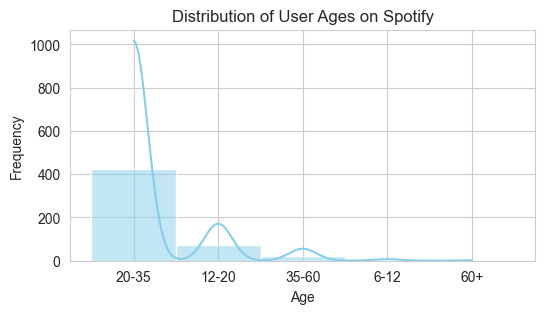

In [111]:
# Distribution of User Ages
plt.figure(figsize=(6, 3))
sns.histplot(data=spotify, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Distribution of User Ages on Spotify')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

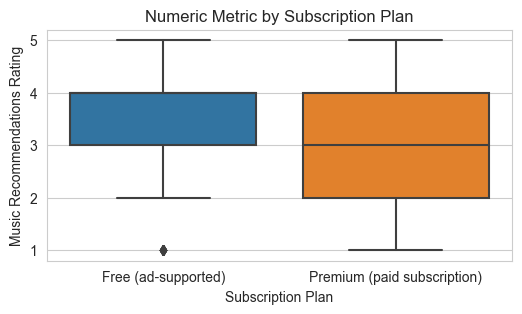

In [112]:
# Boxplot for numerical data to identify outliers
plt.figure(figsize=(6, 3))
sns.boxplot(x='spotify_subscription_plan', y='music_recc_rating', data=spotify)
plt.title('Numeric Metric by Subscription Plan')
plt.xlabel('Subscription Plan')
plt.ylabel('Music Recommendations Rating')
plt.show()


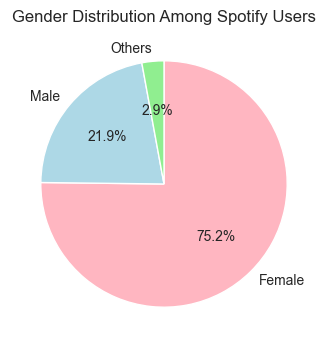

In [113]:
# Gender Distribution
gender_counts = spotify['Gender'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels = gender_counts.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=['lightpink', 'lightblue', 'lightgreen'])
plt.title('Gender Distribution Among Spotify Users')
plt.show()

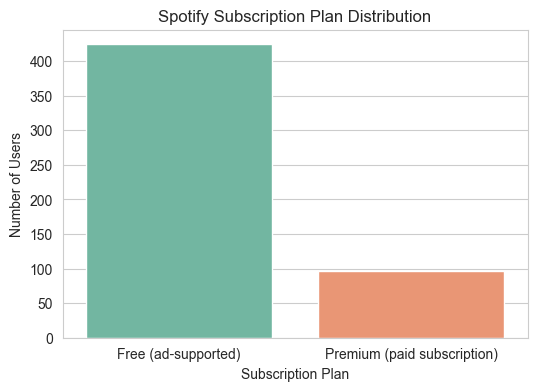

In [114]:
# Subscription Plan Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=spotify, x='spotify_subscription_plan', palette='Set2')
plt.title('Spotify Subscription Plan Distribution')
plt.xlabel('Subscription Plan')
plt.ylabel('Number of Users')
plt.show()

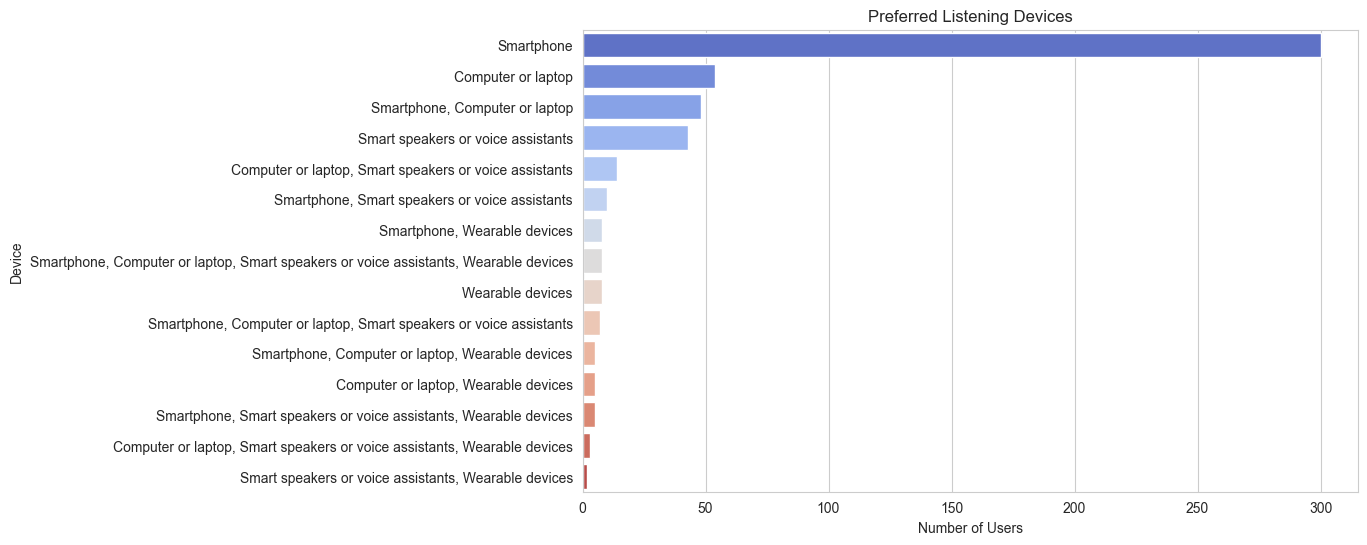

In [115]:
# Preferred Listening Device
plt.figure(figsize=(10, 6))
sns.countplot(data=spotify, y='spotify_listening_device', order = spotify['spotify_listening_device'].value_counts().index, palette='coolwarm')
plt.title('Preferred Listening Devices')
plt.xlabel('Number of Users')
plt.ylabel('Device')
plt.show()

## 🗓️ Preparing Data for PowerBI

The final step is to prepare our dataset for analysis and visualization in PowerBI.

In [118]:
# Exporting the cleaned dataset
output_path = 'output/cleaned_spotify_data.csv'
spotify.to_csv(output_path, index=False)